In [225]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn import metrics
from sklearn.model_selection import train_test_split # module to split our data into train and test sets

import statsmodels.api as sm
import statsmodels.tools 
from sklearn.impute import KNNImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler,StandardScaler

%matplotlib inline

Import Data

In [226]:
cars = pd.read_csv('data/cars_cleaned.csv')
cars.drop(columns=['brand'],inplace=True)
cars.head()

,price,mileage,BHP,transmission,fuel,owners,body,ULEZ,engine,year,model,trim_level,age
0,2000.0,40000.0,89.0,Manual,Petrol,2.0,Hatchback,1,1.4,2006,ASTRA,base,17
1,1695.0,128000.0,148.0,Manual,Diesel,0.0,Hatchback,0,1.9,2006,ASTRA,base,17
2,1299.0,121223.0,123.0,Manual,Petrol,0.0,Hatchback,1,1.8,2006,ASTRA,base,17
3,1495.0,99760.0,103.0,Manual,Petrol,4.0,Hatchback,1,1.6,2006,ASTRA,base,17
4,1695.0,102000.0,103.0,Manual,Petrol,0.0,Hatchback,1,1.6,2006,ASTRA,base,17


In [227]:
# Select only the continuous features from the dataset
cont_features = cars.select_dtypes(include=['float', 'int']).columns.to_list()
cat_features = cars.select_dtypes(include=['object']).columns.to_list()


Percentage of null values in each column 

In [228]:
cars.isnull().mean().round(4) * 100

price           0.0
mileage         0.0
BHP             0.0
transmission    0.0
fuel            0.0
owners          0.0
body            0.0
ULEZ            0.0
engine          0.0
year            0.0
model           0.0
trim_level      0.0
age             0.0
dtype: float64

Find unique values of categorical columns 

In [229]:
cols = cars.select_dtypes(include=['object']).columns.tolist()
for col in cols:
    print(col,':',cars[col].unique())

transmission : ['Manual' 'Automatic']
fuel : ['Petrol' 'Diesel' 'Petrol Plug-in Hybrid']
body : ['Hatchback' 'Convertible' 'Estate' 'Coupe' 'SUV' 'MPV']
model : ['ASTRA' 'NON-FRANCHISE' 'MOKKA' 'GTC' 'CORSA' 'GRANDLAND' 'MERIVA'
 'ZAFIRA']
trim_level : ['base' 'HATCHBACK' 'SPORTS' 'C' 'DIESEL' 'X' 'GTC' 'DOOR' 'EXCITE' 'SE'
 'SRI' 'MPV' 'PLATE' 'TOURER']


## Feature Engineering



In [230]:
def feature_eng(df):
    """
    function to perform second level feature engineering by performing scaling
    on selected columns and one-hot encoding categorical features
    i/p : df
    o/p: df 
    """

    # Define continuous and categorical features
    cont_features = ['BHP','owners','engine','mileage','age']
    cat_features = ['model', 'trim_level', 'fuel', 'transmission', 'body']

    # One-hot encode categorical features using get_dummies
    df_ohe = pd.get_dummies(df, columns=cat_features, drop_first=True, prefix=cat_features)

    # Scale continuous features using StandardScaler
    scaler = StandardScaler()

    cont_transform = scaler.fit_transform(df[cont_features])
    df_ohe[cont_features] = cont_transform

    df_ohe = sm.add_constant(df_ohe)

    return df_ohe


Basic feature engineering

## Split train and test data

split into features and dependent variable

In [231]:
feature_cols = list(cars.columns)
feature_cols.remove('price')
cont_features.remove('price')

# split into features and dependent variable
X = cars[feature_cols]
y = cars['price']

X.head()

,mileage,BHP,transmission,fuel,owners,body,ULEZ,engine,year,model,trim_level,age
0,40000.0,89.0,Manual,Petrol,2.0,Hatchback,1,1.4,2006,ASTRA,base,17
1,128000.0,148.0,Manual,Diesel,0.0,Hatchback,0,1.9,2006,ASTRA,base,17
2,121223.0,123.0,Manual,Petrol,0.0,Hatchback,1,1.8,2006,ASTRA,base,17
3,99760.0,103.0,Manual,Petrol,4.0,Hatchback,1,1.6,2006,ASTRA,base,17
4,102000.0,103.0,Manual,Petrol,0.0,Hatchback,1,1.6,2006,ASTRA,base,17


Train test split

In [232]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
print('X_train shape:',X_train.shape)
print('y_train shape:',y_train.shape)
print('X_test shape:',X_test.shape)
print('y_test shape:',y_test.shape)


X_train shape: (15778, 12)
y_train shape: (15778,)
X_test shape: (3945, 12)
y_test shape: (3945,)


In [233]:
X_train.head()

,mileage,BHP,transmission,fuel,owners,body,ULEZ,engine,year,model,trim_level,age
10191,16847.0,74.000000,Manual,Petrol,0.0,Hatchback,1,1.4,2018,CORSA,DOOR,5
2714,55662.0,113.731258,Manual,Diesel,0.0,Hatchback,1,1.6,2016,ASTRA,base,7
10206,22455.0,113.731258,Manual,Petrol,0.0,Hatchback,1,1.4,2018,CORSA,base,5
14936,69000.0,128.000000,Manual,Diesel,2.0,SUV,0,1.7,2014,MOKKA,base,9
11937,17361.0,113.731258,Manual,Petrol,0.0,Hatchback,1,1.2,2020,CORSA,base,3


### Feature Engineer Train Data 



In [234]:
X_train.dtypes

mileage         float64
BHP             float64
transmission     object
fuel             object
owners          float64
body             object
ULEZ              int64
engine          float64
year              int64
model            object
trim_level       object
age               int64
dtype: object

In [235]:
X_train = feature_eng(X_train)
X_test = feature_eng(X_test)
print('X_train shape:',X_train.shape)
print('y_train shape:',y_train.shape)
print('X_test shape:',X_test.shape)
print('y_test shape:',y_test.shape)

X_train shape: (15778, 35)
y_train shape: (15778,)
X_test shape: (3945, 30)
y_test shape: (3945,)


> X_test has lesser no of features, so corrections should be made while testing 

In [236]:
X_train.head()

,const,mileage,BHP,owners,ULEZ,engine,year,age,model_CORSA,model_GRANDLAND,...,trim_level_X,trim_level_base,fuel_Petrol,fuel_Petrol Plug-in Hybrid,transmission_Manual,body_Coupe,body_Estate,body_Hatchback,body_MPV,body_SUV
10191,1.0,-0.955415,-1.975083,-0.664200,1,-0.179212,2018,-0.701623,1,0,...,0,0,1,0,1,0,0,1,0,0
2714,1.0,0.349800,-0.002978,-0.664200,1,0.808254,2016,-0.121469,0,0,...,0,1,0,0,1,0,0,1,0,0
10206,1.0,-0.766837,-0.002978,-0.664200,1,-0.179212,2018,-0.701623,1,0,...,0,1,1,0,1,0,0,1,0,0
14936,1.0,0.798312,0.705267,0.687677,0,1.301988,2014,0.458685,0,0,...,0,1,0,0,1,0,0,0,0,1
11937,1.0,-0.938131,-0.002978,-0.664200,1,-1.166679,2020,-1.281777,1,0,...,0,1,1,0,1,0,0,1,0,0


In [237]:
feature_cols = list(X_train.columns)

## Modelling

In [238]:
def create_model(Xtrain,ytrain,features,model_name='model'):
    """
    Function to create model
    i/p:X_train,features,model_name
    o/p:model,rmse
    """

    lin_reg = sm.OLS(ytrain, Xtrain[features])
    model = lin_reg.fit()

    y_pred = model.predict(Xtrain[features])

    rmse = statsmodels.tools.eval_measures.rmse(ytrain,y_pred)
    
    # save model in models directory
    model.save("models/"+model_name+".pkl")

    return model,rmse

## Modelling

Model using all columns

In [239]:


model,rmse = create_model(Xtrain=X_train,ytrain=y_train,features=list(X_train.columns),model_name='all')
# retrieve sssr
ssr = model.ssr
print('rmse:',rmse,'ssr:',ssr)



models_rmse={'all':rmse}
models_ssr={'all':ssr}



model.summary()

rmse: 1414.1215202891199 ssr: 31551892578.656845


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     4717.
Date:                Tue, 21 Mar 2023   Prob (F-statistic):               0.00
Time:                        17:49:16   Log-Likelihood:            -1.3685e+05
No. Observations:               15778   AIC:                         2.738e+05
Df Residuals:                   15746   BIC:                         2.740e+05
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -3.8833      0.033   -118.848      0.000      -3.947      -3.819
mileage                    -1521.2402     18.004    -84.495      0.000   -1556.530   -1485.950
BHP                          373.9248     14.865     25.154      0.000     344.787     403.063
owners                      -120.7981     12.454     -9.699      0.000    -145.210     -96.386
ULEZ                         282.8139     56.619      4.995      0.000     171.834     393.794
engine                      -343.5295     19.945    -17.223      0.000    -382.625    -304.434
year                           5.3053      0.143     37.050      0.000       5.025       5.586
age                        -2271.9891     19.105   -118.921      0.000   -2309.437   -2234.541
model_CORSA                -1325.6830     34.586    -38.329      0.000   -1393.476   -1257.889
model_GRANDLAND             -205.4734   1004.480     -0.205      0.838   -2174.369    1763.422
model_GTC                    187.8257    336.260      0.559      0.576    -471.282     846.934
model_MERIVA               -1116.3678     82.221    -13.578      0.000   -1277.530    -955.206
model_MOKKA                -3206.3963   1002.362     -3.199      0.001   -5171.141   -1241.651
model_NON-FRANCHISE         -822.2781    824.103     -0.998      0.318   -2437.615     793.059
model_ZAFIRA                 601.2416     78.161      7.692      0.000     448.038     754.446
trim_level_DIESEL            315.6880    534.831      0.590      0.555    -732.642    1364.018
trim_level_DOOR              553.4148    240.356      2.302      0.021      82.290    1024.539
trim_level_EXCITE            414.4157   1318.580      0.314      0.753   -2170.153    2998.984
trim_level_GTC             -2559.4634    306.921     -8.339      0.000   -3161.065   -1957.862
trim_level_HATCHBACK          43.4421    279.320      0.156      0.876    -504.057     590.942
trim_level_MPV              1109.4104    781.001      1.420      0.155    -421.441    2640.262
trim_level_PLATE            -352.0543   1319.214     -0.267      0.790   -2937.865    2233.757
trim_level_SPORTS            667.3345    573.381      1.164      0.244    -456.558    1791.227
trim_level_SRI             -1004.4063    943.860     -1.064      0.287   -2854.479     845.667
trim_level_TOURER           1103.8903    221.240      4.990      0.000     670.235    1537.545
trim_level_X                 376.8340    211.698      1.780      0.075     -38.117     791.785
trim_level_base              149.8888    206.743      0.725      0.468    -255.351     555.129
fuel_Petrol                 -412.1987     45.130     -9.134      0.000    -500.658    -323.740
fuel_Petrol Plug-in Hybrid  3259.8559   1416.876      2.301      0.021     482.616    6037.096
transmission_Manual        -1327.4892     3

Function to plot correlation

In [240]:
def plot_correlation(corr):
    """
    plots a correlation matrix 
    i/p: corr
    """


    plt.figure(figsize = (20,12)) # setting the size of the output

    sns.heatmap(corr,
                annot = True,
                linecolor='black',
                center=0,
                vmin=-1,
                vmax=1,
                cmap = sns.diverging_palette(600,600, as_cmap=True),
                fmt='.4g')

    plt.title('Correlation matrix of feature columns') # naming the plot


    plt.show()

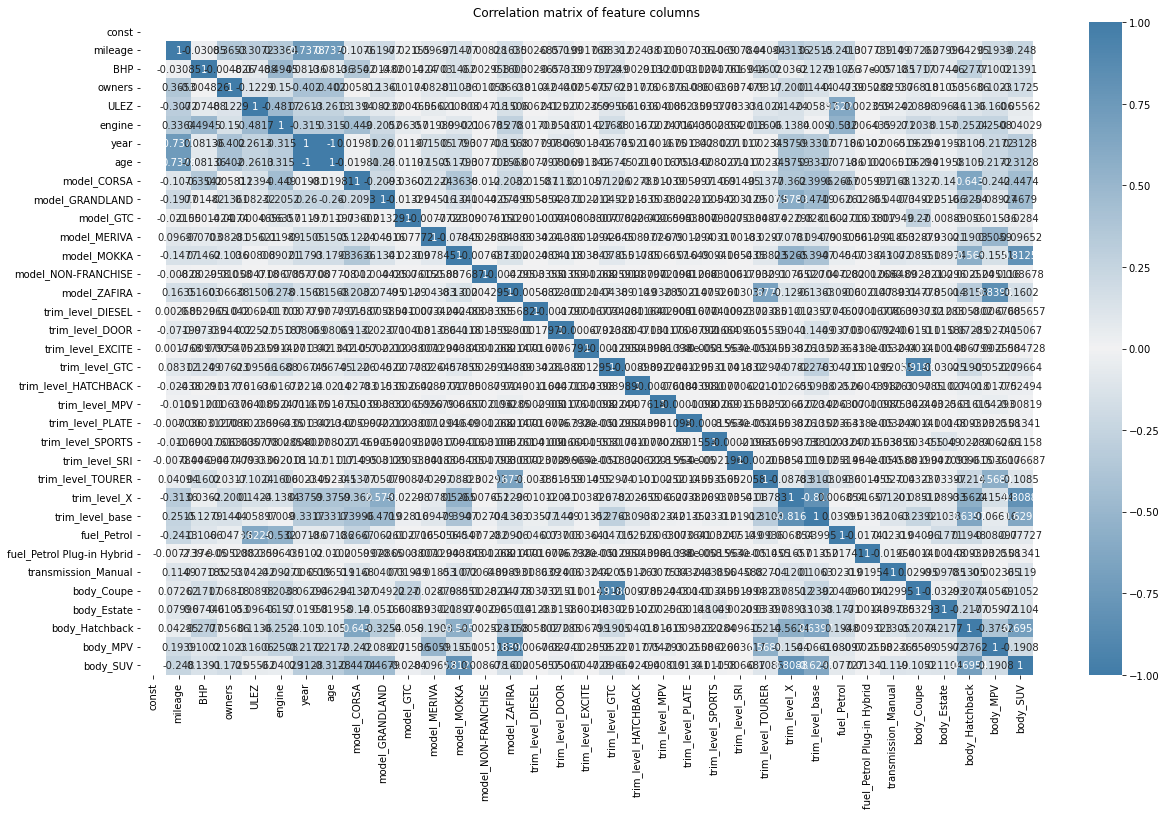

In [241]:
train_corr = X_train.corr()


plot_correlation(train_corr)

Non-Collinear columns

In [242]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 

cols = list(X_train.columns)

## Experiment with what happens when you put 'y_pred'
## Remembering that y_pred is literally determined by the other fields



## We can create an indexed list (a series) where we list the VIF of each of the columns. Note the use of '.shape' in the second part of the loop
vifs = pd.Series([variance_inflation_factor(X_train[cols].values, i) for i in range(X_train[cols].shape[1])], index = X_train[cols].columns)
high_vifs = vifs[vifs > 5].index.tolist()
high_vifs

d:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1736: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
d:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
d:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
d:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
d:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
d:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195:

['year',
 'age',
 'model_GRANDLAND',
 'model_MERIVA',
 'model_MOKKA',
 'model_NON-FRANCHISE',
 'model_ZAFIRA',
 'trim_level_DIESEL',
 'trim_level_DOOR',
 'trim_level_EXCITE',
 'trim_level_GTC',
 'trim_level_HATCHBACK',
 'trim_level_MPV',
 'trim_level_PLATE',
 'trim_level_SPORTS',
 'trim_level_SRI',
 'trim_level_TOURER',
 'trim_level_X',
 'trim_level_base',
 'body_Coupe',
 'body_Estate',
 'body_Hatchback',
 'body_MPV',
 'body_SUV']

In [243]:


## It runs the model with all of the variables. 
## If any of them have a higher VIF than 5, it drops the max. 
## Then it keeps going until none of them have a higher VIF than 5.
## This leaves us with a nice set of features with no collineraity

def calculate_vif(X_df, thresh = 5.0):
    variables = list(range(X.shape[1]))
    dropped = True
    while dropped:
        dropped = False
        # this bit uses list comprehension to gather all the VIF values of the different variables
        vif = [variance_inflation_factor(X_df.iloc[:, variables].values, ix)
               for ix in range(X_df.iloc[:, variables].shape[1])]
        
        del vif[0]
        maxloc = vif.index(max(vif)) + 1 # getting the index of the highest VIF value
        if max(vif) > thresh:
            print('dropping \'' + X_df.iloc[:, variables].columns[maxloc] +
                  '\' at index: ' + str(maxloc))
            del variables[maxloc] # we delete the highest VIF value on condition that it's higher than the threshold
            dropped = True # if we deleted anything, we set the 'dropped' value to True to stay in the while loop

    print('Remaining variables:')
    return list(X_df.iloc[:, variables].columns) # and return our X cut down to the remaining variables

In [244]:
noncollinear_cols = calculate_vif(X_train[cols])
noncollinear_cols

d:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1736: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
d:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


dropping 'year' at index: 6
Remaining variables:


['const',
 'mileage',
 'BHP',
 'owners',
 'ULEZ',
 'engine',
 'age',
 'model_CORSA',
 'model_GRANDLAND',
 'model_GTC',
 'model_MERIVA']

In [245]:
non_significant_features = {'trim_level_PLATE',
                            'trim_level_MPV',
                            'trim_level_DOOR',
                            'trim_level_EXCITE',
                            'trim_level_SPORTS',
                            'trim_level_SRI',
                            'trim_level_SE',
                            'trim_level_DIESEL'
                             }

filtered_cols = list(set(noncollinear_cols)- non_significant_features)

In [246]:
model,rmse = create_model(Xtrain=X_train,ytrain=y_train,features=filtered_cols)
ssr = model.ssr
print('rmse:',rmse,'ssr:',ssr)

rmse: 1516.3406220441418 ssr: 36278179981.16184


In [247]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                 1.253e+04
Date:                Tue, 21 Mar 2023   Prob (F-statistic):               0.00
Time:                        17:49:28   Log-Likelihood:            -1.3795e+05
No. Observations:               15778   AIC:                         2.759e+05
Df Residuals:                   15767   BIC:                         2.760e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
model_GRANDLAND  3412.5389     52.111     65.486      0.000    3310.396    3514.682
engine           -232.6654     19.063    -12.205      0.000    -270.031    -195.300
model_GTC        2384.5718    254.407      9.373      0.000    1885.906    2883.238
model_MERIVA    -1599.4090     78.620    -20.344      0.000   -1753.513   -1445.305
ULEZ              -79.6917     52.672     -1.513      0.130    -182.935      23.552
mileage         -1644.7324     18.480    -89.001      0.000   -1680.955   -1608.510
BHP               389.7896     14.978     26.024      0.000     360.431     419.148
const            9754.5986     53.076    183.787      0.000    9650.564    9858.633
model_CORSA     -1702.9286     30.989    -54.953      0.000   -1763.670   -1642.187
age             -2289.5286     19.028   -120.324      0.000   -2326.826   -2252.231
owners           -123.4214     13.301     -9.279      0.000    -149.492     -97.350
==============================================================================
Omnibus:                     1810.297   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4888.755
Skew:                           0.643   Prob(JB):                         0.00
Kurtosis:                       5.405   Cond. No.                         32.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## XgBoost Regression

In [289]:
import xgboost as xgb
import helper
import pickle

# Instantiate XGBoost regressor
xgb_reg = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, max_depth=3, learning_rate=0.1)

filtered_cols.remove('const')

# Train the model
xgb_reg.fit(X_train[filtered_cols], y_train)

# Make predictions on test data
y_pred = xgb_reg.predict(X_train[filtered_cols])

# Save the trained model
with open('models/xgb_model.pkl', 'wb') as f:
    pickle.dump(xgb_reg, f)
    

# Calculate RMSE
rmse, mae, r2 = np.sqrt(helper.eval_metrics(y_train, y_pred))
print('RMSE:', rmse)
print('MAE:', mae)
print('R2:', r2)

d:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


RMSE: 33.99927162308511
MAE: 29.059202334080858
R2: 0.9669726820750092


The R-squared value of 0.901 indicates that about 90% of the variance in the dependent variable 'price' is explained by the independent variables in the model. The F-statistic and its corresponding p-value suggest that the overall model is significant.

## Testing

In [290]:
# Perform OHE on X_test, using the columns from X_train_ohe
X_test = X_test.reindex(columns=filtered_cols, fill_value=0)
print(X_test.shape)
X_test.head()

(3945, 10)


,model_GRANDLAND,engine,model_GTC,model_MERIVA,ULEZ,mileage,BHP,model_CORSA,age,owners
18377,0,-0.162271,0,0,1,-1.175290,0.011545,0,-0.985950,-0.666524
16685,0,0.842690,0,0,1,0.546646,0.011545,0,-0.403461,-0.666524
15258,0,0.842690,0,0,1,0.675414,-0.026101,0,0.179029,-0.666524
218,0,0.842690,0,0,1,2.042865,-0.540919,0,2.508986,-0.666524
11037,0,-0.162271,0,0,1,-0.761368,0.011545,1,-0.985950,-0.666524


Compute test rmse

In [292]:
results_df=helper.evaluate_models(X_test,y_test,filtered_cols)
results_df

ValueError: shapes (3945,10) and (11,) not aligned: 10 (dim 1) != 11 (dim 0)

# Testing using single input

### Test Data

In [ ]:
import datetime

def predict_price(car_input, model,filtered_cols):
    # Create a DataFrame from the input dictionary
    df = pd.DataFrame([car_input])

    # df['model'] = df['model'].str.split(' ').str[1]

    df['model'] = df['model'].str.upper()

    current_year = datetime.datetime.now().year

    df['year'] = df['year'].astype('int')
    df['age'] = np.where(pd.notnull(df['year']), current_year - df['year'], df['year'].max())
    df.drop(['year'], axis=1, inplace=True)
    
    # Extract the car's condition
    condition = df['Condition'][0]

    # Drop columns that are not needed
    cols_to_drop = ['make', 'writeoff', 'Condition']
    df.drop(columns=cols_to_drop, inplace=True, axis=1)
    df['ULEZ'] = df['ULEZ'].apply(lambda x: 1 if x == 'ULEZ' else 0)

    # One-hot encode categorical columns
    cols_to_ohe = ['model', 'fuel', 'transmission', 'body']
    df_ohe = pd.get_dummies(df, columns=cols_to_ohe)
    df_ohe = sm.add_constant(df_ohe)

    # Reindex the DataFrame to match the filtered_cols used to train the model
    test_ohe = df_ohe.reindex(columns=filtered_cols, fill_value=0)

    print(test_ohe)

    # Make a prediction using the model
    price = model.predict(test_ohe)[0]

    # Apply a discount based on the car's condition
    if condition.lower() == 'no damage':
        price *= 0.8
    elif condition.lower() == 'moderate damage':
        price *= 0.5
    elif condition.lower() == 'heavy damage':
        price *= 0.3

    # Format the price as a string and return it
    return f"Predicted price for {car_input['model']} is £{round(price, 2)}"

In [ ]:
car_input = {'make': 'Vauxhall',
             'model':'Grandland',
             'year':'2019',
             'writeoff':'',
             'mileage':4000,
             'BHP':100,
             'transmission':'Manual',
             'fuel':'Petrol',
             'owners':2,
             'body':'Hatchback',
             'ULEZ':'Yes',
             'engine':1.4,
             'Condition':'No damage',
            }

model = 'models/xgb_model.pkl'
# Load the saved model
with open('models/xgb_model.pkl', 'rb') as f:
    xgb_reg = pickle.load(f)

price = predict_price(car_input, xgb_reg,filtered_cols)
price

   model_GRANDLAND  engine  model_GTC  model_MERIVA  ULEZ  mileage  BHP  \
0                1     1.4          0             0     0     4000  100   

   const  model_CORSA  age  owners  
0      0            0    4       2  


'Predicted price for Grandland is £4547.67'

In [ ]:
filtered_cols

['model_GRANDLAND',
 'engine',
 'model_GTC',
 'model_MERIVA',
 'ULEZ',
 'mileage',
 'BHP',
 'const',
 'model_CORSA',
 'age',
 'owners']